In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv("data.csv")

```statistics(data)```
    
__Functionality:__ Display the first few rows of the data and generate descriptive statistics of the numerical columns.

__Parameters:__ 
    
- __data (DataFrame):__ Input data loaded from the CSV file.

__Output:__ None


In [2]:
def statistics(data):
    # Display the first few rows of te data
    print(data.head())


    # Generate descriptive statistics of the numerical columns
    print(data.describe())

```missingData(data)```
    
__Functionality:__ Check for missing values in each column and fill missing values with appropriate strategies.

__Parameters:__ 
    
- __data (DataFrame):__ Input data loaded from the CSV file.

__Output:__ None


In [3]:
def missingData(data):
    # Check for missing values in each column
    print(data.isnull().sum())

    # Fill  missing values with approproate strategies
    # For example, fill missing numerical values with mean
    data["Length (Kilometers)"].fillna(data["Length (Kilometers)"].mean(), inplace=True)
    data["Travel Time (Minutes)"].fillna(data["Travel Time (Minutes)"].mean(), inplace=True)

    # For categorial variables, fill missing values with mode
    data["Weather"].fillna(data["Weather"].mode()[0], inplace=True)


```commonDistance(data)```
    
__Functionality:__ Plot a histogram of the "Length" variable.

__Parameters:__ 
    
- __data (DataFrame):__ Input data loaded from the CSV file.

__Output:__ None


In [4]:
def commonDistance(data):
    # Plot a histogram of the "Length" variable
    plt.hist(data["Length (Kilometers)"], bins=10)
    plt.xlabel("Length (Kilometers)")
    plt.ylabel("Frequency")
    plt.title("Distribution of Length")
    plt.show()

```travelTimePlotBox(data)```
    
__Functionality:__ Create a box plot of the "Travel Time" variable.

__Parameters:__ 
    
- __data (DataFrame):__ Input data loaded from the CSV file.

__Output:__ None


In [5]:
def travelTimePlotBox(data):
    # Create a box plot of the "Travel Time" variable
    plt.boxplot(data["Travel Time (Minutes)"])
    plt.ylabel("Travel Time (Minutes)")
    plt.title("Distribution of Travel Time")
    plt.show()

```commonWeatherBarPlt(data)```
    
__Functionality:__ Create a bar plot for the "Weather" variable.

__Parameters:__ 
    
- __data (DataFrame):__ Input data loaded from the CSV file.

__Output:__ None


In [6]:
def commonWeatherBarPlt(data):
    # Create a bar plot for the "Weather" variable
    weather_counts = data["Weather"].value_counts()
    plt.bar(weather_counts.index, weather_counts.values)
    plt.xlabel("Weather")
    plt.ylabel("Count")
    plt.title("Frequency of Weather Conditions")
    plt.show()

```correlationMatrix(data)```
    
__Functionality:__ Calculate the correlation matrix and create a heatmap.

__Parameters:__ 
    
- __data (DataFrame):__ Input data loaded from the CSV file.

__Output:__ None


In [7]:
def correlationMatrix(data):
    
    # Calculate the correlation matrix
    correlation_matrix = data[["Length (Kilometers)", "Travel Time (Minutes)", "Speed (km/h)", "Temperature"]].corr()

    # Create a heatmap of the correlation matrix
    plt.imshow(correlation_matrix, cmap="coolwarm", interpolation="nearest")
    plt.colorbar()
    plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
    plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
    plt.title("Correlation Matrix")
    plt.show()

```averageTravelTimeInWeek(data)```
    
__Functionality:__ Calculate the average travel time for each day of the week and plot the results.


__Parameters:__ 
    
- __data (DataFrame):__ Input data loaded from the CSV file.

__Output:__ None


In [8]:
def averageTravelTimeInWeek(data):
    # Convert the "Date" column to datetime format
    data["Date"] = pd.to_datetime(data["Date"])

    # Extract the day of the week from the "Date" column
    data["DayOfWeek"] = data["Date"].dt.day_name()

    # Define the order of the weekdays
    weekdays_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

    # Calculate the average travel time for each day of the week
    average_travel_time = data.groupby("DayOfWeek")["Travel Time (Minutes)"].mean().reindex(weekdays_order)

    # Plot the linear graph
    plt.plot(average_travel_time.index, average_travel_time.values)
    plt.xlabel("Day of the Week")
    plt.ylabel("Average Travel Time (Minutes)")
    plt.title("Average Travel Time by Day of the Week")
    plt.xticks(rotation=45)
    plt.show()

```averageTravelTimeByMonth(data)```
    
__Functionality:__     Calculate the average travel time for each month and year and plot the results.


__Parameters:__ 
    
- __data (DataFrame):__ Input data loaded from the CSV file.

__Output:__ None


In [9]:
def averageTravelTimeByMonth(data):
    # Extract the month and year from the "Date" column
    data["Month"] = data["Date"].dt.month
    data["Year"] = data["Date"].dt.year

    # Calculate the average travel time for each month and year
    average_travel_time = data.groupby(["Year", "Month"])["Travel Time (Minutes)"].mean().reset_index()

    # Sort the data by month and year
    average_travel_time.sort_values(["Year", "Month"], inplace=True)

    # Convert the month number to month name
    month_names = pd.date_range(start="2023-01-01", periods=12, freq="MS").strftime("%B").tolist()
    average_travel_time["Month"] = average_travel_time["Month"].map(lambda x: month_names[x-1])

    # Remove the duplicate data point for the first month
    average_travel_time = average_travel_time.iloc[1:]

    # Plot the linear graph
    plt.plot(average_travel_time["Month"], average_travel_time["Travel Time (Minutes)"], marker="o")
    plt.xlabel("Month")
    plt.ylabel("Average Travel Time (Minutes)")
    plt.title("Average Travel Time by Month")
    plt.xticks(rotation=45)
    plt.show()

```averageTravelTimeByHour(data)```
    
__Functionality:__     Calculate the average travel time for each hour of the day and plot the results.

__Parameters:__ 
    
- __data (DataFrame):__ Input data loaded from the CSV file.

__Output:__ None


In [10]:
def averageTravelTimeByHour(data):
    
    # Read the data from the CSV file
    data = pd.read_csv('data.csv')

    # Calculate the average travel time for each hour
    average_travel_time = data.groupby(data['Hour'].astype(str).str[:2])['Travel Time (Minutes)'].mean().reset_index()

    # Plot the graph
    plt.plot(average_travel_time['Hour'], average_travel_time['Travel Time (Minutes)'])
    plt.xlabel('Hour of the Day')
    plt.ylabel('Average Travel Time (Minutes)')
    plt.title('Average Travel Time by Hour of the Day')
    plt.xticks(range(24))
    plt.grid(True)
    plt.show()

```averageTravelTimeByWeather(data)```
    
__Functionality:__     Calculate the average travel time for each weather category and plot the results.


__Parameters:__ 
    
- __data (DataFrame):__ Input data loaded from the CSV file.

__Output:__ None


In [11]:
def averageTravelTimeByWeather(data):
    # Read the data from the CSV file
    data = pd.read_csv('data.csv')

    # Define the desired order of weather categories
    weather_order = ['Clear', 'Rain', 'Clouds']

    # Calculate the average travel time for each weather category
    average_travel_time = data.groupby('Weather')['Travel Time (Minutes)'].mean().reset_index()

    # Convert average travel time to "MM:SS" format
    average_travel_time['Travel Time (Minutes)'] = average_travel_time['Travel Time (Minutes)'].apply(lambda x: str(datetime.timedelta(seconds=int(x*60)))[-5:])

    # Reorder the rows based on the defined weather order
    average_travel_time['Weather'] = pd.Categorical(average_travel_time['Weather'], categories=weather_order, ordered=True)
    average_travel_time.sort_values('Weather', inplace=True)

    # Create a scatter plot with average travel time
    plt.scatter(average_travel_time['Weather'], average_travel_time['Travel Time (Minutes)'], color='blue', marker='o', label='Average Travel Time')
    plt.plot(average_travel_time['Weather'], average_travel_time['Travel Time (Minutes)'], color='red', linestyle='-', linewidth=2)
    plt.xlabel('Weather')
    plt.ylabel('Average Travel Time (MM:SS)')
    plt.title('Average Travel Time by Weather')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the functions

        Date   Hour  Length (Kilometers)  Travel Time (Minutes)  Speed (km/h)  \
0 2022-06-14  00:00                62.21                   48.0          77.0   
1 2022-06-14  01:00                62.21                   48.0          77.0   
2 2022-06-14  02:00                62.21                   48.0          77.0   
3 2022-06-14  03:00                62.21                   48.0          77.0   
4 2022-06-14  04:00                62.21                   49.0          76.0   

                Arrival Time  Temperature Weather DayOfWeek  Month  Year  
0  2022-06-14T00:48:39+03:00        17.47   Clear   Tuesday      6  2022  
1  2022-06-14T01:48:39+03:00        17.46   Clear   Tuesday      6  2022  
2  2022-06-14T02:48:39+03:00        17.43   Clear   Tuesday      6  2022  
3  2022-06-14T03:48:39+03:00        16.88  Clouds   Tuesday      6  2022  
4  2022-06-14T04:49:16+03:00        16.43  Clouds   Tuesday      6  2022  
       Length (Kilometers)  Travel Time (Minutes)  Speed (km/h)

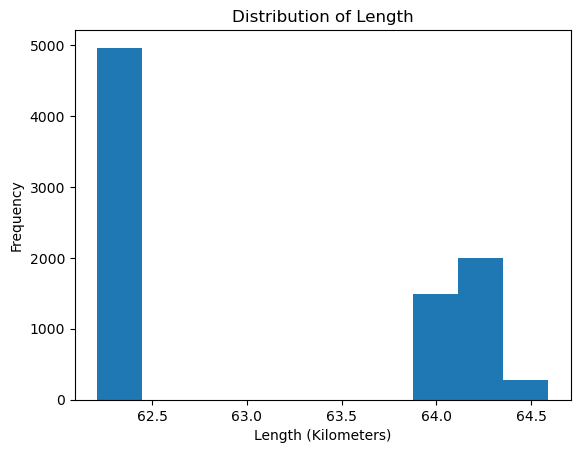

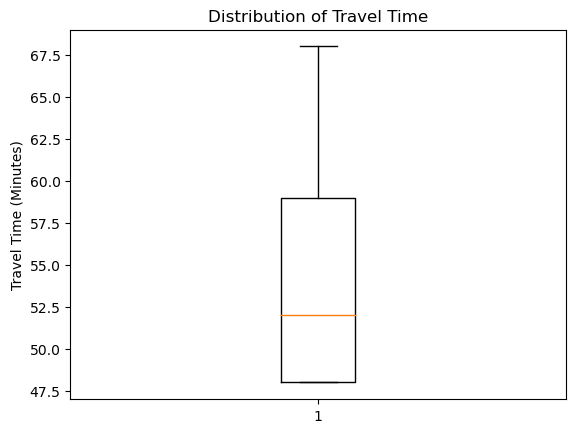

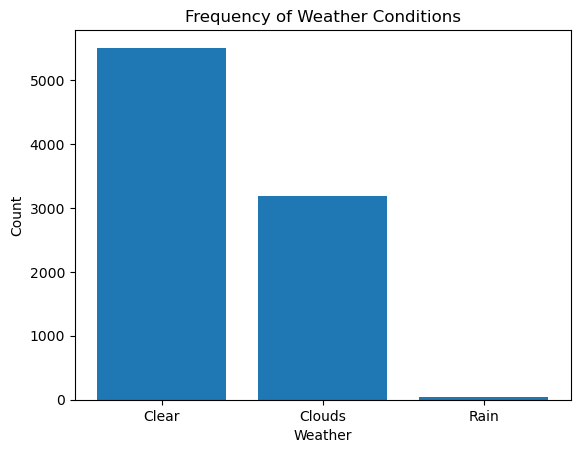

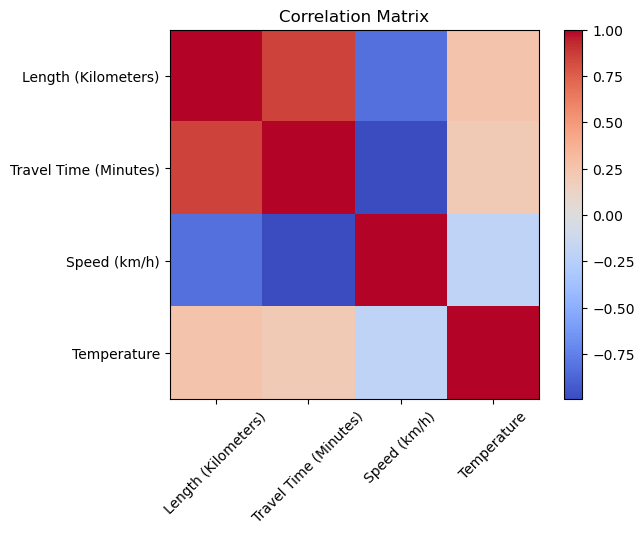

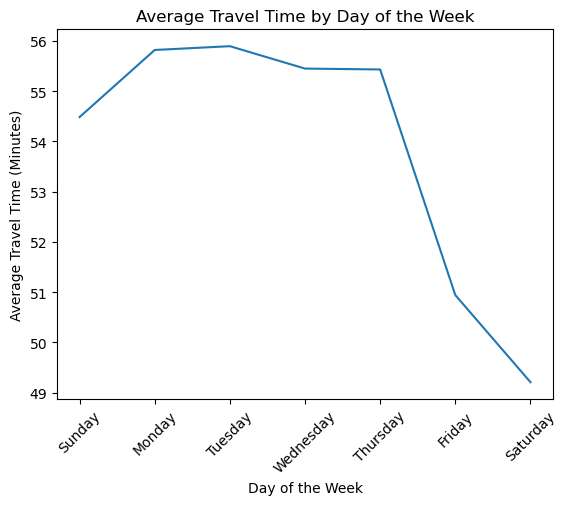

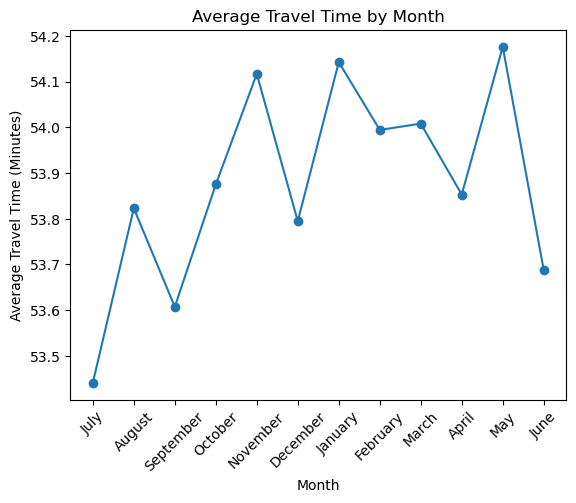

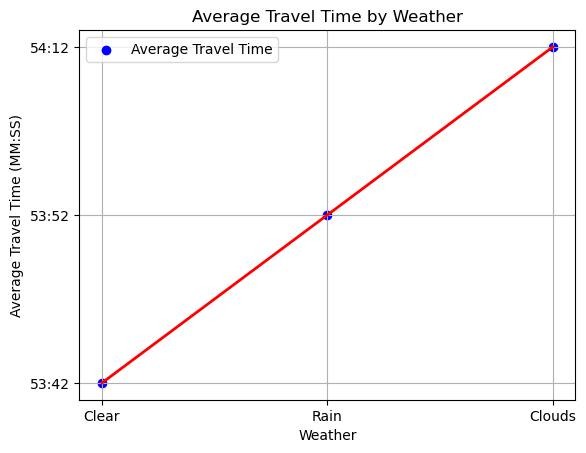

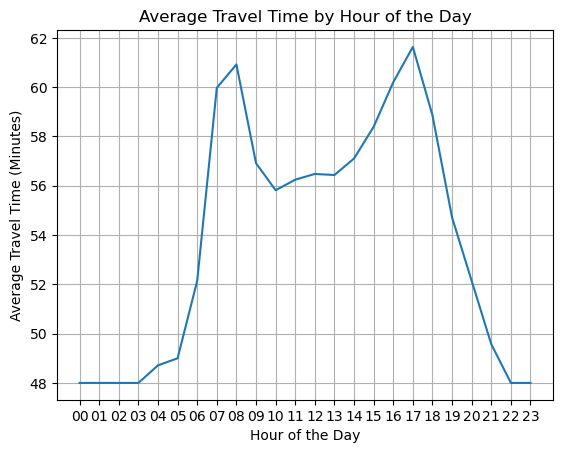

In [13]:
statistics(data)
missingData(data)
commonDistance(data)
travelTimePlotBox(data)
commonWeatherBarPlt(data)
correlationMatrix(data)
averageTravelTimeInWeek(data)
averageTravelTimeByMonth(data)
averageTravelTimeByWeather(data)
averageTravelTimeByHour(data)
